In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
np.random.seed(42)  # Set random seed for numpy

import random
random.seed(42)  # Set random seed for random module

In [7]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/data_processed_selected.csv')

In [8]:
def preprocess_entities(row):
    if pd.isna(row)==False:
        entities = row.lower()  # Convert to lowercase
        entities = entities.replace(',', '')  # Remove commas
        entities = ' '.join(set(entities.split()))  # Convert to set to get unique values, then join back as a string
        return entities
df['entities'] = df['entities'].apply(preprocess_entities)

In [9]:
y=df['reason']
X = df[['narrative_tfidf', 'tfidf_title', 'tfidf_keywords', 'events_tfidf', 'entities']]
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

# Print the shape of each set
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (15701, 5)
y_train shape: (15701,)
X_val shape: (3364, 5)
y_val shape: (3364,)
X_test shape: (3365, 5)
y_test shape: (3365,)


In [ ]:
import warnings
feature_set=['narrative_tfidf']
X_train_selected = X_train_val[feature_set].apply(lambda x: ' '.join(x.fillna('').astype(str)), axis=1)
X_test_selected = X_test[feature_set].apply(lambda x: ' '.join(x.fillna('').astype(str)), axis=1)

# Transform the features using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_df=0.95, min_df=2)
X_train_val_combined_transformed = vectorizer.fit_transform(X_train_val_combined)
X_test_combined_transformed = vectorizer.transform(X_test_combined)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train['narrative_tfidf'])
X_val_bow = vectorizer.transform(X_val['narrative_tfidf'])
X_test_bow = vectorizer.transform(X_test['narrative_tfidf'])

In [22]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)

MultinomialNB()

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.64      0.60      1195
           1       0.34      0.08      0.12       333
           2       0.71      0.81      0.76      1609
           3       0.55      0.17      0.26       227

    accuracy                           0.64      3364
   macro avg       0.54      0.42      0.43      3364
weighted avg       0.61      0.64      0.60      3364



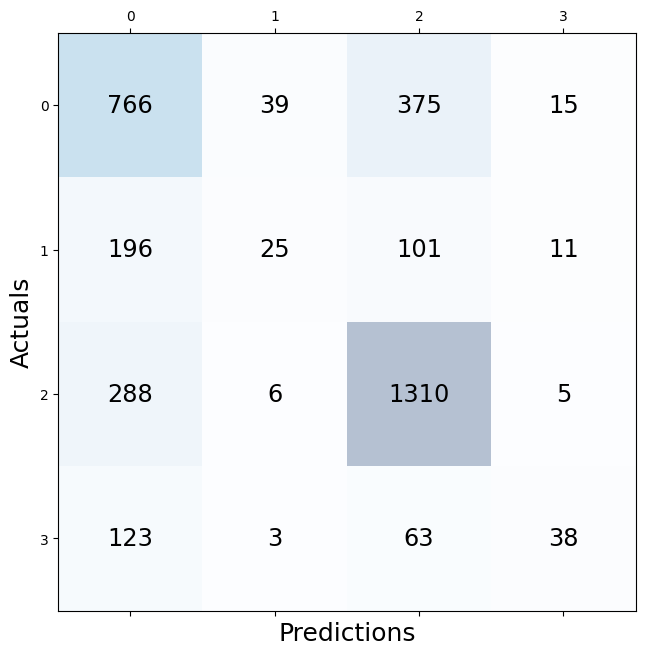

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Validation set
y_val_pred = nb_classifier.predict(X_val_bow)
class_rep= classification_report(y_val, y_val_pred)
print('Classification Report: \n', class_rep)

confusion_mat = confusion_matrix(y_true=y_val, y_pred=y_val_pred, labels=[0,1,2,3])
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        ax.text(x=j, y=i,s=confusion_mat[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()
print('\n')

Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.59      0.56      1195
           1       0.26      0.06      0.10       333
           2       0.69      0.82      0.75      1609
           3       0.36      0.09      0.14       228

    accuracy                           0.61      3365
   macro avg       0.46      0.39      0.39      3365
weighted avg       0.57      0.61      0.58      3365



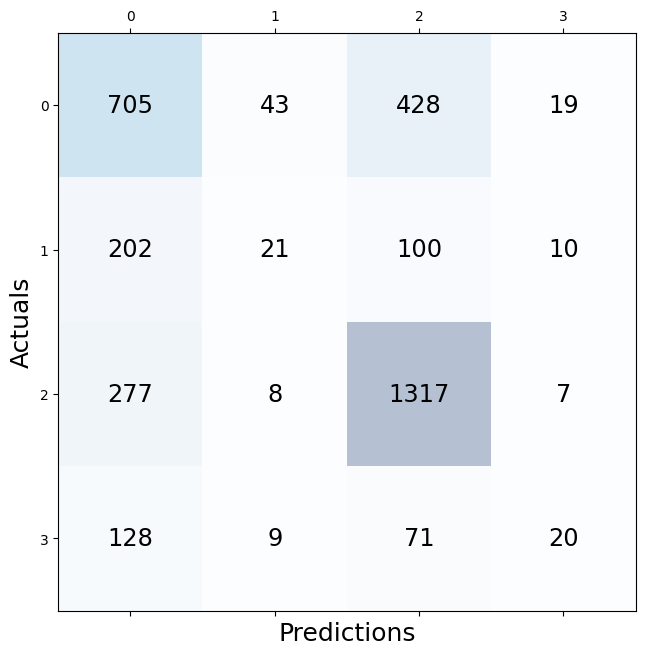

In [24]:
# Test set
y_test_pred = nb_classifier.predict(X_test_bow)
class_rep= classification_report(y_test, y_test_pred)
print('Classification Report: \n', class_rep)

confusion_mat = confusion_matrix(y_true=y_test, y_pred=y_test_pred, labels=[0,1,2,3])
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        ax.text(x=j, y=i,s=confusion_mat[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()
print('\n')